In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [24]:
pip install --upgrade pingouin

Requirement already up-to-date: pingouin in /usr/local/lib/python3.6/dist-packages (0.3.5)


In [0]:
import pingouin as pg
import pandas.util.testing as tm

In [26]:
df = pd.read_csv("base_data.csv")
print('%i subjects and %i columns' % df.shape)
df.head(3)

419 subjects and 39 columns


,HML_SI,HML_SI_BIN,HML_SI_CAT,CORR_PRODUCTION,CORR_NC_RATE,CORR_COKE_RATE,CORR_FUEL_RATE,CORR_COAL_RATE,HM_TEMP,QUARTZ_RATE,LIMESTONE_RATE,SLAG_RATE,PYROXINITE_RATE,SINTER_PERC,PELLET_PERC,HOT_BLAST_TEMP,COLD_BLAST_O2_ENRICH,O2_INJ_FLOW,COLD_BLAST_HUMID,FUR_RAFT_TEMP,COMP_COLD_BLAST_FLOW,UPTAKE_AVG,HL_TOTAL_GJ_HR,UPPER_K,MIDDLE_K,LOWER_K,K,HML_S,HML_CAO,HML_SIO2,HML_MGO,HML_AL2O3,HML_CAO_SIO2,COK_MOISTURE,COK_CSR,COK_CRI,COK_AMS,SIN_CAO_SIO2,SIN_MGO
0,0.758,0,H,6392.38,51.624,361.681,539.236,177.555,1514.714,9.048,0.0,292,17.143,46.972,39.951,1186.936,6.981,22528.467,15.857,2246.775,215.774,119.175,138.406,0.553,0.815,2.201,3.568,0.039,35.683,32.997,9.207,19.463,1.081,0.767,67.31,22.38,37.497,2.437,1.710
1,0.823,0,H,6398.66,51.730,345.385,531.830,186.445,1509.167,14.762,0.0,298,17.143,49.610,40.000,1187.759,7.000,22554.510,15.600,2219.580,215.272,118.954,133.576,0.575,0.858,2.066,3.500,0.045,34.124,34.620,9.509,19.310,0.986,1.500,67.93,22.96,37.560,2.368,1.792
2,0.806,0,H,6438.70,51.874,343.703,529.299,185.596,1517.857,6.825,0.0,296,15.238,50.122,39.965,1186.042,6.877,22178.738,15.138,2215.444,215.966,111.061,129.657,0.571,0.733,2.218,3.522,0.039,34.580,33.847,9.435,19.458,1.022,0.833,68.10,23.50,37.424,2.342,1.710


In [37]:
pg.corr(x=df['CORR_COKE_RATE'], y=df['CORR_FUEL_RATE'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,419,0.809231,"[0.77, 0.84]",0.654854,0.653195,2.272696e-98,4.51e+94,1.0


In [43]:
pg.corr(x=df['COLD_BLAST_O2_ENRICH'], y=df['O2_INJ_FLOW'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,419,0.965819,"[0.96, 0.97]",0.932807,0.932484,1.270594e-246,1.321e+242,1.0


In [44]:
pg.corr(x=df['HML_CAO'], y=df['HML_CAO_SIO2'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,419,0.829125,"[0.8, 0.86]",0.687448,0.685945,2.311255e-107,3.922e+103,1.0


In [46]:
pg.pairwise_corr(df).sort_values(by=['p-unc'])[['X', 'Y','n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
450,COLD_BLAST_O2_ENRICH,O2_INJ_FLOW,419,0.965819,1.270594e-246
651,HML_CAO,HML_CAO_SIO2,419,0.829125,2.311255e-107
142,CORR_COKE_RATE,CORR_FUEL_RATE,419,0.809231,2.272696e-98
693,COK_CSR,COK_CRI,419,-0.773106,1.790853e-84
0,HML_SI,HML_SI_BIN,419,-0.716918,2.536355e-67


In [47]:
df.corr().round(2)

,HML_SI,HML_SI_BIN,CORR_PRODUCTION,CORR_NC_RATE,CORR_COKE_RATE,CORR_FUEL_RATE,CORR_COAL_RATE,HM_TEMP,QUARTZ_RATE,LIMESTONE_RATE,SLAG_RATE,PYROXINITE_RATE,SINTER_PERC,PELLET_PERC,HOT_BLAST_TEMP,COLD_BLAST_O2_ENRICH,O2_INJ_FLOW,COLD_BLAST_HUMID,FUR_RAFT_TEMP,COMP_COLD_BLAST_FLOW,UPTAKE_AVG,HL_TOTAL_GJ_HR,UPPER_K,MIDDLE_K,LOWER_K,K,HML_S,HML_CAO,HML_SIO2,HML_MGO,HML_AL2O3,HML_CAO_SIO2,COK_MOISTURE,COK_CSR,COK_CRI,COK_AMS,SIN_CAO_SIO2,SIN_MGO
HML_SI,1.00,-0.72,-0.18,0.08,0.30,0.09,-0.37,0.37,0.10,0.02,-0.17,-0.10,0.07,0.08,-0.16,-0.28,-0.24,0.50,-0.02,0.30,0.21,0.01,0.31,0.14,-0.05,0.14,-0.20,-0.19,-0.01,-0.00,0.26,-0.15,0.08,-0.06,0.11,-0.03,-0.25,-0.12
HML_SI_BIN,-0.72,1.00,0.14,-0.01,-0.23,-0.10,0.23,-0.31,-0.11,0.01,0.10,0.10,-0.09,-0.01,0.02,0.18,0.15,-0.26,-0.12,-0.21,-0.14,-0.05,-0.22,-0.16,0.05,-0.14,0.18,0.14,0.02,0.04,-0.22,0.10,-0.06,0.04,-0.07,-0.00,0.17,0.09
CORR_PRODUCTION,-0.18,0.14,1.00,-0.16,-0.50,-0.42,0.17,0.14,-0.05,-0.16,-0.23,-0.11,0.13,0.11,0.28,0.45,0.59,-0.30,0.21,0.16,-0.17,-0.28,-0.09,-0.28,-0.24,-0.50,0.21,-0.10,0.08,0.04,-0.04,-0.12,-0.01,-0.06,0.05,0.08,-0.06,0.01
CORR_NC_RATE,0.08,-0.01,-0.16,1.00,0.15,0.07,-0.13,-0.15,0.24,0.04,0.22,-0.11,-0.15,-0.06,-0.04,-0.12,-0.10,0.10,0.04,0.12,0.04,-0.16,-0.10,-0.07,0.20,0.15,-0.04,-0.01,0.03,-0.04,0.09,-0.02,-0.26,0.06,-0.10,-0.02,-0.09,-0.15
CORR_COKE_RATE,0.30,-0.23,-0.50,0.15,1.00,0.81,-0.41,-0.08,0.15,0.15,0.30,0.18,-0.03,-0.03,-0.31,-0.36,-0.41,0.30,0.08,0.11,-0.08,-0.03,-0.01,0.05,0.17,0.23,-0.08,0.01,0.03,-0.02,0.02,-0.01,0.20,-0.15,0.14,-0.07,-0.09,0.07
CORR_FUEL_RATE,0.09,-0.10,-0.42,0.07,0.81,1.00,0.20,-0.20,0.09,0.16,0.30,0.21,-0.14,0.06,-0.08,-0.08,-0.13,-0.07,-0.07,-0.12,-0.13,-0.08,-0.07,-0.09,0.21,0.15,-0.03,0.07,0.02,-0.03,-0.06,0.04,0.23,-0.21,0.18,-0.05,0.02,0.24
CORR_COAL_RATE,-0.37,0.23,0.17,-0.13,-0.41,0.20,1.00,-0.17,-0.11,-0.01,-0.04,0.02,-0.17,0.13,0.40,0.49,0.48,-0.60,-0.24,-0.37,-0.06,-0.06,-0.09,-0.22,0.04,-0.14,0.09,0.09,-0.03,-0.00,-0.12,0.09,0.02,-0.07,0.05,0.04,0.17,0.27
HM_TEMP,0.37,-0.31,0.14,-0.15,-0.08,-0.20,-0.17,1.00,-0.01,-0.03,-0.18,-0.07,0.19,0.10,0.20,-0.02,0.06,0.21,0.28,0.24,0.13,-0.01,0.29,0.03,-0.35,-0.29,-0.26,-0.00,-0.28,0.10,0.16,0.16,-0.11,0.02,0.08,0.08,-0.05,-0.17
QUARTZ_RATE,0.10,-0.11,-0.05,0.24,0.15,0.09,-0.11,-0.01,1.00,0.11,0.49,-0.31,0.09,-0.21,-0.06,-0.09,-0.07,0.10,-0.01,0.11,-0.31,-0.17,-0.34,-0.16,0.26,0.07,0.02,0.30,0.32,-0.35,-0.28,0.05,0.12,0.09,0.01,0.08,0.12,-0.05
LIMESTONE_RATE,0.02,0.01,-0.16,0.04,0.15,0.16,-0.01,-0.03,0.11,1.00,0.24,-0.08,-0.08,0.01,-0.00,-0.11,-0.09,0.07,0.00,0.09,-0.03,-0.00,0.01,0.11,0.03,0.12,-0.03,-0.04,-0.02,0.04,0.04,-0.02,0.08,0.01,-0.03,-0.09,0.07,-0.07


Text(0.5, 1.0, 'Correlation matrix')

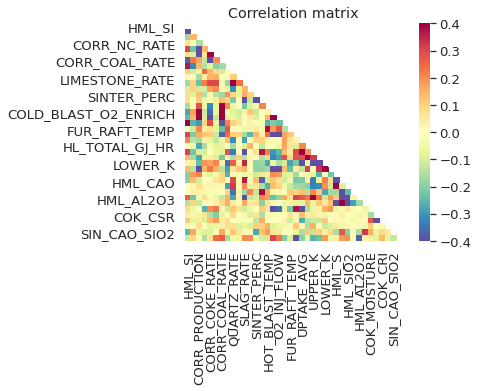

In [31]:
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [32]:
df.rcorr(stars=False)

,HML_SI,HML_SI_BIN,CORR_PRODUCTION,CORR_NC_RATE,CORR_COKE_RATE,CORR_FUEL_RATE,CORR_COAL_RATE,HM_TEMP,QUARTZ_RATE,LIMESTONE_RATE,SLAG_RATE,PYROXINITE_RATE,SINTER_PERC,PELLET_PERC,HOT_BLAST_TEMP,COLD_BLAST_O2_ENRICH,O2_INJ_FLOW,COLD_BLAST_HUMID,FUR_RAFT_TEMP,COMP_COLD_BLAST_FLOW,UPTAKE_AVG,HL_TOTAL_GJ_HR,UPPER_K,MIDDLE_K,LOWER_K,K,HML_S,HML_CAO,HML_SIO2,HML_MGO,HML_AL2O3,HML_CAO_SIO2,COK_MOISTURE,COK_CSR,COK_CRI,COK_AMS,SIN_CAO_SIO2,SIN_MGO
HML_SI,-,0.000,0.000,0.122,0.000,0.079,0.000,0.000,0.033,0.693,0.000,0.037,0.13,0.112,0.001,0.000,0.000,0.000,0.646,0.000,0.000,0.871,0.000,0.003,0.296,0.003,0.000,0.000,0.829,0.983,0.000,0.003,0.083,0.19,0.021,0.594,0.000,0.018
HML_SI_BIN,-0.717,-,0.004,0.913,0.000,0.041,0.000,0.000,0.025,0.803,0.044,0.036,0.068,0.825,0.709,0.000,0.003,0.000,0.016,0.000,0.005,0.329,0.000,0.001,0.34,0.005,0.000,0.005,0.737,0.439,0.000,0.045,0.255,0.451,0.142,0.975,0.001,0.061
CORR_PRODUCTION,-0.177,0.141,-,0.001,0.000,0.000,0.000,0.005,0.274,0.001,0.000,0.031,0.006,0.026,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.057,0.000,0.000,0.000,0.000,0.044,0.116,0.418,0.416,0.014,0.844,0.229,0.265,0.103,0.232,0.850
CORR_NC_RATE,0.076,-0.005,-0.155,-,0.003,0.145,0.007,0.003,0.000,0.377,0.000,0.031,0.002,0.236,0.359,0.016,0.037,0.041,0.379,0.013,0.431,0.001,0.046,0.184,0.000,0.003,0.419,0.889,0.574,0.39,0.079,0.652,0.000,0.193,0.049,0.734,0.079,0.002
CORR_COKE_RATE,0.303,-0.231,-0.5,0.145,-,0.000,0.000,0.092,0.003,0.001,0.000,0.000,0.498,0.593,0.000,0.000,0.000,0.000,0.123,0.021,0.1,0.493,0.835,0.358,0.000,0.000,0.089,0.878,0.487,0.656,0.694,0.762,0.000,0.002,0.005,0.138,0.080,0.17
CORR_FUEL_RATE,0.086,-0.1,-0.425,0.071,0.809,-,0.000,0.000,0.065,0.001,0.000,0.000,0.003,0.229,0.101,0.122,0.008,0.174,0.138,0.018,0.009,0.112,0.178,0.060,0.000,0.002,0.522,0.161,0.686,0.588,0.24,0.407,0.000,0.000,0.000,0.265,0.75,0.000
CORR_COAL_RATE,-0.372,0.23,0.174,-0.131,-0.412,0.202,-,0.001,0.031,0.784,0.434,0.617,0.001,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.185,0.186,0.081,0.000,0.429,0.004,0.066,0.055,0.595,0.923,0.013,0.073,0.620,0.126,0.327,0.458,0.001,0.000
HM_TEMP,0.37,-0.312,0.137,-0.146,-0.083,-0.198,-0.169,-,0.871,0.593,0.000,0.134,0.000,0.045,0.000,0.705,0.239,0.000,0.000,0.000,0.007,0.829,0.000,0.540,0.000,0.000,0.000,0.969,0.000,0.050,0.001,0.001,0.024,0.757,0.12,0.099,0.346,0.000
QUARTZ_RATE,0.104,-0.109,-0.054,0.245,0.147,0.09,-0.105,-0.008,-,0.023,0.000,0.000,0.06,0.000,0.252,0.082,0.174,0.039,0.796,0.031,0.000,0.001,0.000,0.001,0.000,0.159,0.745,0.000,0.000,0.000,0.000,0.279,0.017,0.068,0.910,0.116,0.011,0.335
LIMESTONE_RATE,0.019,0.012,-0.164,0.043,0.155,0.158,-0.013,-0.026,0.111,-,0.000,0.098,0.101,0.76,0.921,0.03,0.053,0.183,0.927,0.055,0.572,0.924,0.846,0.022,0.524,0.014,0.503,0.418,0.645,0.425,0.375,0.700,0.117,0.809,0.598,0.059,0.178,0.166


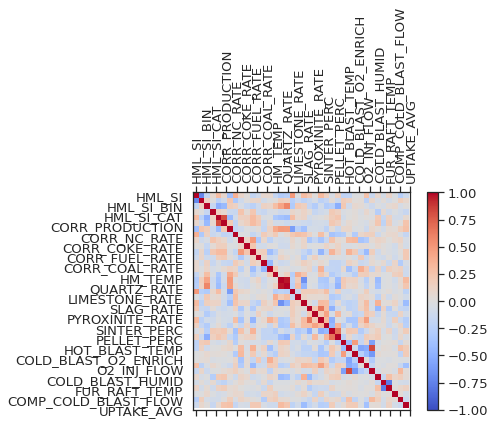

In [34]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1.8)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()
